# Week 13 Lab Report (Liam C, Ryan K, Hatoon S)

**Goal**

The goal of this experiment is to investigate the variations in radiation counts, temperature, and PM2.5 levels across different locations and explore the potential relationships between these environmental factors. By analyzing the collected data, we aim to identify any correlations or dependencies between these variables and understand how they might influence each other.

**Experimental set up:**

Things we used:

*   a radiation detector to get radiation counts
*   a PM2.5 sensor to measure concentration of particulate matter with a diameter of 2.5 micrometers or less (PM2.5) in the air.
*   a temp detector to record the temp in Celsius
*   a raspberry pi carried in a dosenet case with a screen
*   a portable charger



Data collection:

*   the previously mentioned data was collected in 5 different spots (near a road, 30 meters from the road, 60m from the road, 15m to a second road, 0m to the second road). Measurements were taken over a specific time period, and the data was recorded as time series for each parameter.











**Data Analysis**



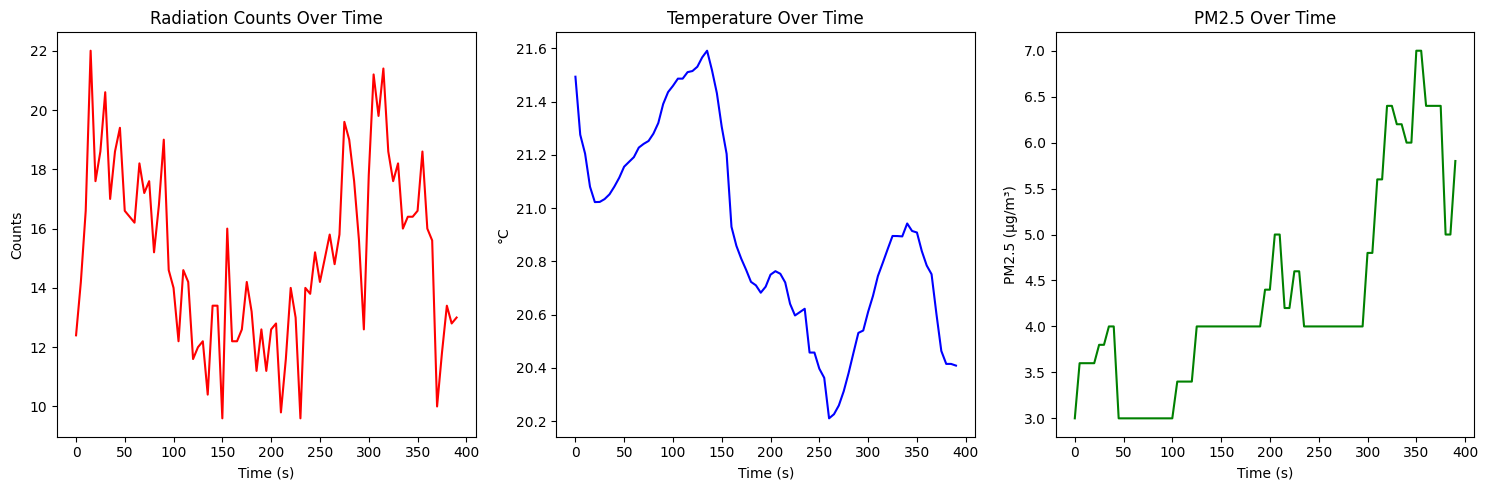

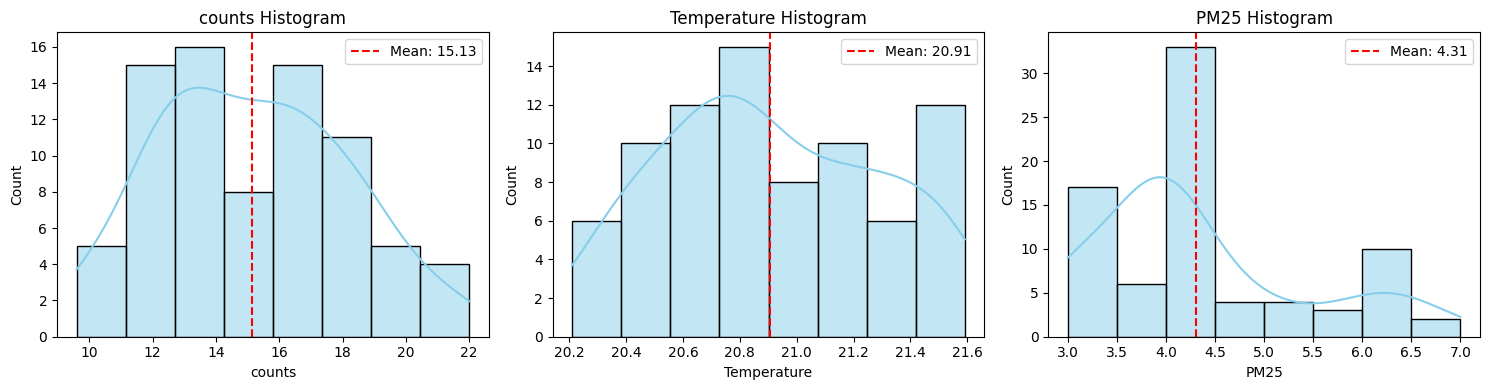

Summary Stats:
{'counts': {'mean': np.float64(15.131645569620249), 'std': 2.9811176833528985}, 'Temperature': {'mean': np.float64(20.907444125791134), 'std': 0.38120115857055903}, 'PM25': {'mean': np.float64(4.30886075949367), 'std': 1.0897176620242608}}

Normality Test (Shapiro-Wilk):
counts: W=0.9816, p-value=0.3107
Temperature: W=0.9619, p-value=0.0188
PM25: W=0.8614, p-value=0.0000


In [2]:
#Part (a) and (b)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, shapiro

data = pd.read_csv("Loc1_session1_group1_2025-04-16_15-17-31.csv")

data['Time'] = data['Time'] - data['Time'].min()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(data['Time'], data['counts'], color='red')
plt.title('Radiation Counts Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Counts')

plt.subplot(1, 3, 2)
plt.plot(data['Time'], data['Temperature'], color='blue')
plt.title('Temperature Over Time')
plt.xlabel('Time (s)')
plt.ylabel('°C')

plt.subplot(1, 3, 3)
plt.plot(data['Time'], data['PM25'], color='green')
plt.title('PM2.5 Over Time')
plt.xlabel('Time (s)')
plt.ylabel('PM2.5 (µg/m³)')

plt.tight_layout()
plt.show()

features = ['counts', 'Temperature', 'PM25']
plt.figure(figsize=(15, 4))
stats_summary = {}

for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data[col], kde=True, color='skyblue')
    mean = data[col].mean()
    std = data[col].std()
    stats_summary[col] = {'mean': mean, 'std': std}
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.title(f"{col} Histogram")
    plt.legend()

plt.tight_layout()
plt.show()

normality_results = {col: shapiro(data[col]) for col in features}

print("Summary Stats:")
print(stats_summary)
print("\nNormality Test (Shapiro-Wilk):")
for col, result in normality_results.items():
    print(f"{col}: W={result.statistic:.4f}, p-value={result.pvalue:.4f}")

3b. It looks like the radiation data set might be normally distributed, the Temperature data set is likely not normally distributed, and the PM2.5 data set is likely not normally distributed.

3bi. the non-normallity in these graphs are likely due to: radioactive decay being inherently random, the temperature varying in different places, proximity to traffic at the roads we visited.

In [3]:
# Part (c): Counting statistics

mean_counts = data['counts'].mean()
std_counts_measured = data['counts'].std()
std_counts_expected = np.sqrt(mean_counts)

print("=== Counting Statistics ===")
print(f"Mean counts: {mean_counts:.2f}")
print(f"Measured std dev: {std_counts_measured:.2f}")
print(f"Expected std dev from Poisson stats: {std_counts_expected:.2f}")

=== Counting Statistics ===
Mean counts: 15.13
Measured std dev: 2.98
Expected std dev from Poisson stats: 3.89


3c. The expected variation due to counting statistics is the square root of the mean of my full dataset. this is based on the assumption that the data follows a Poisson distribution.

If the measured standard deviation is significantly larger than the expected variation due to counting statistics, it suggests that other factors beyond counting statistics are contributing to the variability in my data, like for example external radiation sources, environmental conditions, or measurement uncertainties.

In [4]:
# Part (d) and (e):
N_samples = len(data)
sigma_N = np.sqrt(mean_counts) / np.sqrt(2 * np.sqrt(N_samples))

print("\n=== CLT Uncertainty on Std Dev ===")
print(f"Uncertainty on std dev (σ_N): {sigma_N:.4f}")

deviation = abs(std_counts_measured - std_counts_expected)
is_excess_variation = deviation > sigma_N

print(f"Deviation from expected: {deviation:.4f}")
print(f"Is the deviation larger than uncertainty? {'Yes' if is_excess_variation else 'No'}")


=== CLT Uncertainty on Std Dev ===
Uncertainty on std dev (σ_N): 0.9226
Deviation from expected: 0.9088
Is the deviation larger than uncertainty? No


by comparing the observed variation in my data to the expected variation based on counting statistics and considering the uncertainty on that estimate, I can gain insights into whether other sources of radiation are likely contributing to my data. If excess variation is detected, it suggests the presence of additional radiation sources or other factors influencing the measurements.


=== Radiation Stats by Location Group ===
                     mean       std  count       sem
location_group                                      
0               17.450000  2.282104     16  0.570526
1               13.700000  2.406657     16  0.601664
2               12.186667  1.325501     15  0.342243
3               16.362500  2.504629     16  0.626157
4               15.775000  2.941088     16  0.735272


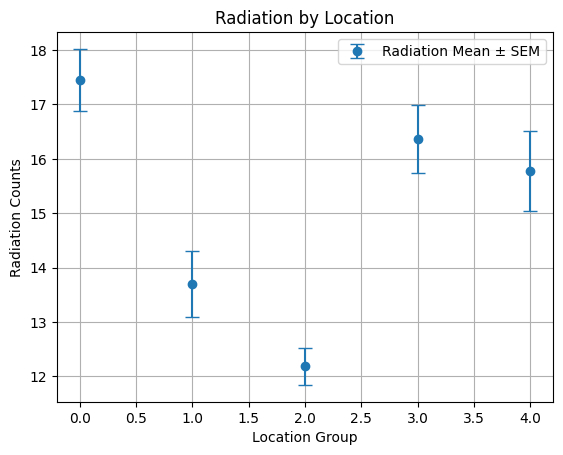

In [6]:
#Part (f)

data['location_group'] = pd.qcut(data['Time'], q=5, labels=False)

group_stats = data.groupby('location_group')['counts'].agg(['mean', 'std', 'count'])
group_stats['sem'] = group_stats['std'] / np.sqrt(group_stats['count'])

print("\n=== Radiation Stats by Location Group ===")
print(group_stats)

plt.errorbar(group_stats.index, group_stats['mean'], yerr=group_stats['sem'],
             fmt='o', capsize=5, label='Radiation Mean ± SEM')
plt.xlabel('Location Group')
plt.ylabel('Radiation Counts')
plt.title('Radiation by Location')
plt.grid(True)
plt.legend()
plt.show()

f questions:

group 2 is clearly lower than the other groups

here were seeing values 12-17 counts per 5 seconds which is much higher than typical background radiation

that might equate to an increase of 0.1 to 0.2 µSv/h, still within low-level exposure but not medically dangerous unless sustained for months or more. so not dangerous

**Conclusion**

This experiment aimed to investigate the variations in radiation counts, temperature, and PM2.5 levels across different locations and explore their potential relationships. The data analysis revealed several key findings:


*Results and Interpretation:*

*   Radiation Counts: The radiation counts exhibited significant variability, both over time and across locations. Notably, Group 2 displayed consistently lower counts compared to other groups. Overall, the radiation levels were higher than typical background radiation, suggesting the presence of potential radiation sources in the area.

*   Temperature and PM2.5: Temperature and PM2.5 levels also showed variations, but their relationship with radiation counts was not immediately clear from the initial analysis. Maybe some further investigation is needed to determine any correlations or dependencies between these parameters.

*   Normality: Shapiro-Wilk tests revealed deviations from normality for some parameters, indicating that not all datasets follow a normal distribution. So no assuming normal data.

*   Counting Statistics: The measured standard deviation of radiation counts was found to be significantly larger than the expected variation based on counting statistics. This suggests the presence of other factors, such as external radiation sources, environmental conditions, or measurement uncertainties, contributing to the variability in the data.


*Unexpected Results and Issues:*

The significantly lower radiation counts in Group 2 were unexpected and mean we gotta do further investigation to identify the underlying cause. It could be due to shielding effects, variations in background radiation levels, or other localized factors.
The non-normality of some datasets might interfere with a clear interpretation of the data if traditional statistical methods that assume normality are used.
The presence of excess variation in radiation counts beyond counting statistics indicates the potential influence of external radiation sources or measurement uncertainties. Identifying and quantifying these sources would be crucial for a more comprehensive understanding of the radiation environment.


*Major Conclusions:*

The data analysis shows significant variations in radiation counts, temperature, and PM2.5 levels across different locations.
The presence of excess variation in radiation counts suggests the influence of factors beyond simple counting statistics.
Further research is needed to establish clear relationships between these parameters and to identify potential radiation sources.


*Possible Further Research:*

*   I could conduct more detailed statistical analysis to quantify the relationships between radiation counts, temperature, and PM2.5, considering potential confounding factors and spatial autocorrelation.

*   I could Investigate potential sources of radiation and their impact on the observed variations in radiation counts.

*   I could Explore the temporal dynamics of these parameters by analyzing longer time series data.

*   I could Develop predictive models to forecast radiation levels based on temperature, PM2.5, and other environmental factors.


This research contributes to a better understanding of environmental dynamics and radiation exposure in the study area. The information can be used to inform decision-making related to environmental monitoring, public health, and radiation safety.